## K-means to segment customer based on RFM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. **Thu thập và tiền xử lý dữ liệu**
   - **Task 1.1:** Thu thập dữ liệu khách hàng.
     - **Gợi ý:** Đọc dữ liệu từ file CSV.
     ```python
     import pandas as pd

     df = pd.read_csv('OnlineRetail.csv')
     ```


In [3]:
path = "D:\OneDrive - National Economics University\Day hoc\Tiếng Anh\Data prepare and visualization\Projects"
df = pd.read_csv(path+'/OnlineRetail.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203422 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    203422 non-null  object 
 1   StockCode    203422 non-null  object 
 2   Description  202623 non-null  object 
 3   Quantity     203422 non-null  int64  
 4   InvoiceDate  203422 non-null  object 
 5   UnitPrice    203422 non-null  float64
 6   CustomerID   150039 non-null  float64
 7   Country      203422 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.4+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


   - **Task 1.2:** Làm sạch dữ liệu.
     - **Gợi ý:** Xử lý các giá trị thiếu, loại bỏ các bản ghi không hợp lệ.
     ```python
     df.dropna(inplace=True)  # Loại bỏ các hàng có giá trị thiếu
     df = df[df['Price'] > 0]  # Loại bỏ các giao dịch có giá trị không hợp lệ


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
features = ['CustomerID','InvoiceDate','Quantity','UnitPrice']

In [7]:
df.dropna(inplace=True)
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
#df = df[df['Country'] =='United Kingdom']
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146478 entries, 0 to 203421
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   146478 non-null  float64
 1   InvoiceDate  146478 non-null  object 
 2   Quantity     146478 non-null  int64  
 3   UnitPrice    146478 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.6+ MB


   - **Task 1.3:** Chuẩn hóa và định dạng lại dữ liệu.
     - **Gợi ý:** Đảm bảo cột thời gian ở định dạng datetime.
     ```python
     df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
     ```



In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### 2. **Tính toán các biến số RFM**
   - **Task 2.1:** Tính toán Recency.
     - **Gợi ý:** Tính số ngày kể từ giao dịch cuối cùng.
     ```python
     reference_date = df['InvoiceDate'].max()
     df['Recency'] = (reference_date - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days
     ```


In [9]:
reference_date = df['InvoiceDate'].max()
reference_date

Timestamp('2011-06-30 20:08:00')

In [10]:
df['Recency'] = (reference_date - df['InvoiceDate']).dt.days
df.head()

,CustomerID,InvoiceDate,Quantity,UnitPrice,Recency
0,13313.0,2011-01-04 10:00:00,10,1.95,177
1,13313.0,2011-01-04 10:00:00,25,0.42,177
2,13313.0,2011-01-04 10:00:00,25,0.42,177
3,13313.0,2011-01-04 10:00:00,5,2.10,177
4,13313.0,2011-01-04 10:00:00,10,1.25,177


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146478 entries, 0 to 203421
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   146478 non-null  float64       
 1   InvoiceDate  146478 non-null  datetime64[ns]
 2   Quantity     146478 non-null  int64         
 3   UnitPrice    146478 non-null  float64       
 4   Recency      146478 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.7 MB


   - **Task 2.2:** Tính toán Monetary.
     - **Gợi ý:** Tính tổng số tiền mà mỗi khách hàng đã chi tiêu.
     ```python
     df['Monetary'] = df['Quantity'] * df['Price']
     rfm = df.groupby('CustomerID').agg({
         'Recency': 'min',
         'Frequency': 'max',
         'Monetary': 'sum'
     }).reset_index()
     ```


In [12]:
df['Monetary'] = df['UnitPrice']*df["Quantity"]
df.head()

,CustomerID,InvoiceDate,Quantity,UnitPrice,Recency,Monetary
0,13313.0,2011-01-04 10:00:00,10,1.95,177,19.5
1,13313.0,2011-01-04 10:00:00,25,0.42,177,10.5
2,13313.0,2011-01-04 10:00:00,25,0.42,177,10.5
3,13313.0,2011-01-04 10:00:00,5,2.10,177,10.5
4,13313.0,2011-01-04 10:00:00,10,1.25,177,12.5


In [13]:
rm = df.groupby("CustomerID")[['Recency','Monetary']].agg({'Recency':'min',
                                                      "Monetary":'sum'})
rm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2724 entries, 12346.0 to 18287.0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Recency   2724 non-null   int64  
 1   Monetary  2724 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 63.8 KB


   - **Task 2.3:** Tính toán Frequency.
     - **Gợi ý:** Đếm số lượng giao dịch của mỗi khách hàng.
     ```python
     df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
     ```


In [36]:
f = df.groupby("CustomerID")['CustomerID'].count()
f = pd.DataFrame(f)
f 

,CustomerID
CustomerID,
12346.0,1
12347.0,71
12348.0,11
12350.0,17
12352.0,38
...,...
18273.0,1
18280.0,10
18281.0,7


In [38]:
f.rename(columns={'CustomerID':"Frequency"}, inplace=True)
f 

,Frequency
CustomerID,
12346.0,1
12347.0,71
12348.0,11
12350.0,17
12352.0,38
...,...
18273.0,1
18280.0,10
18281.0,7


In [40]:
rfm = rm.join(f)
rfm

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,163,77183.60,1
12347.0,21,1494.16,71
12348.0,86,594.44,11
12350.0,148,334.40,17
12352.0,100,1561.81,38
...,...,...,...
18273.0,95,51.00,1
18280.0,115,180.60,10
18281.0,18,80.82,7


### 3. **Phân tích dữ liệu RFM**
   - **Task 3.1:** Phân tích thống kê mô tả các biến RFM.
     - **Gợi ý:** Sử dụng hàm `describe` để xem các thống kê cơ bản.
     ```python
     rfm.describe()
     ```


In [41]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2724 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    2724 non-null   int64  
 1   Monetary   2724 non-null   float64
 2   Frequency  2724 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 149.7 KB


In [42]:
rfm.head() 

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,163,77183.60,1
12347.0,21,1494.16,71
12348.0,86,594.44,11
12350.0,148,334.40,17
12352.0,100,1561.81,38


In [43]:
rfm.describe()

,Recency,Monetary,Frequency
count,2724.000000,2724.000000,2724.000000
mean,59.764684,1255.907401,53.773128
std,47.913115,4580.475886,98.713037
min,0.000000,2.900000,1.000000
25%,20.000000,246.982500,13.000000
50%,46.000000,494.820000,29.000000
75%,94.000000,1069.660000,62.000000
max,177.000000,127410.230000,2427.000000


- **Task 3.2:** Trực quan hóa dữ liệu RFM.
     - **Gợi ý:** Sử dụng `seaborn` để vẽ biểu đồ phân phối và boxplot.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     sns.histplot(rfm['Recency'], kde=True)
     plt.show()
     sns.boxplot(x=rfm['Frequency'])
     plt.show()
     sns.scatterplot(x='Recency', y='Monetary', data=rfm)
     plt.show()
     ```


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


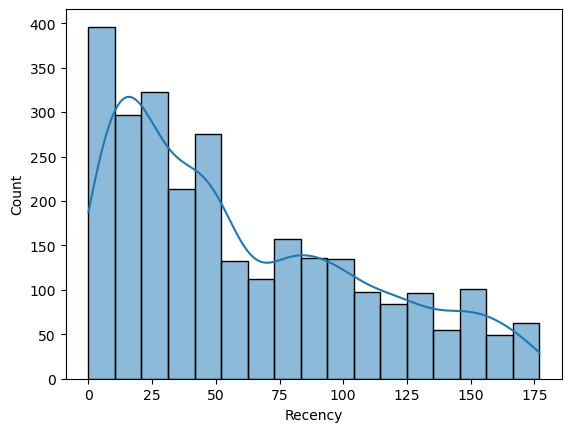

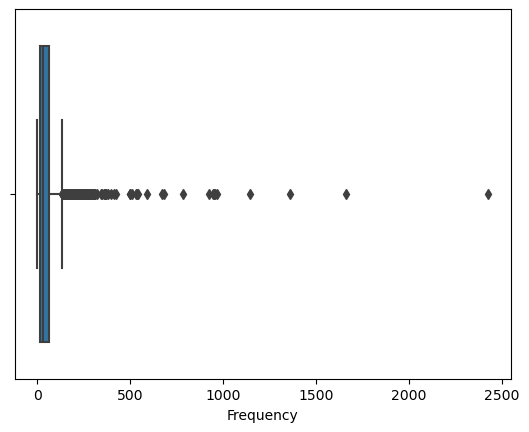

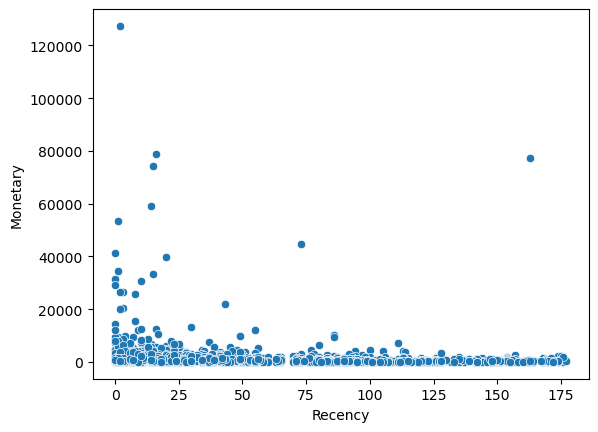

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(rfm['Recency'], kde=True)
plt.show()
sns.boxplot(x=rfm['Frequency'])
plt.show()
sns.scatterplot(x='Recency', y='Monetary', data=rfm)
plt.show()

   - **Task 3.3:** Tạo ma trận tương quan giữa các biến RFM.
     - **Gợi ý:** Sử dụng `corr` để tính toán và `heatmap` để trực quan hóa.
     ```python
     sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
     plt.show()
     ```


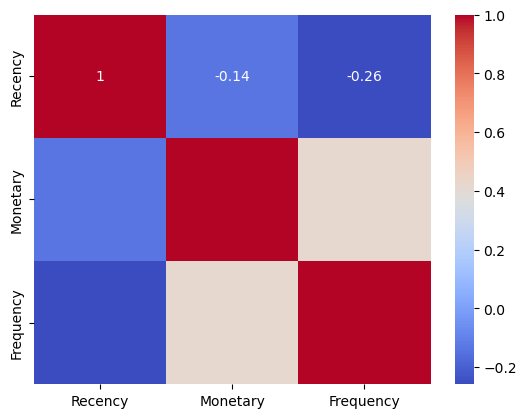

In [45]:
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.show()

### 4. **Chuẩn bị dữ liệu cho mô hình K-means**
   - **Task 4.1:** Chuẩn hóa dữ liệu RFM.
     - **Gợi ý:** Sử dụng `StandardScaler` để chuẩn hóa.
     ```python
     from sklearn.preprocessing import StandardScaler

     scaler = StandardScaler()
     rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
     ```


In [46]:
rfm.head()

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,163,77183.60,1
12347.0,21,1494.16,71
12348.0,86,594.44,11
12350.0,148,334.40,17
12352.0,100,1561.81,38


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [48]:
rfm_scaled

array([[ 2.15503145, -0.53470969, 16.57941994],
       [-0.80921062,  0.1745467 ,  0.05202436],
       [ 0.54766075, -0.43338735, -0.14443671],
       ...,
       [-0.87183545, -0.47391628, -0.25658975],
       [-1.10145984,  2.9305144 , -0.09025335],
       [-0.43346163, -0.25100713, -0.10713242]])

- **Task 4.2:** Chọn số lượng cụm K.
     - **Gợi ý:** Sử dụng Elbow Method để xác định số cụm tối ưu.
     ```python
     from sklearn.cluster import KMeans
     import numpy as np

     sse = []
     for k in range(1, 11):
         kmeans = KMeans(n_clusters=k, random_state=42)
         kmeans.fit(rfm_scaled)
         sse.append(kmeans.inertia_)

     plt.plot(range(1, 11), sse, marker='o')
     plt.xlabel('Number of clusters')
     plt.ylabel('SSE')
     plt.show()
     ```


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\clust

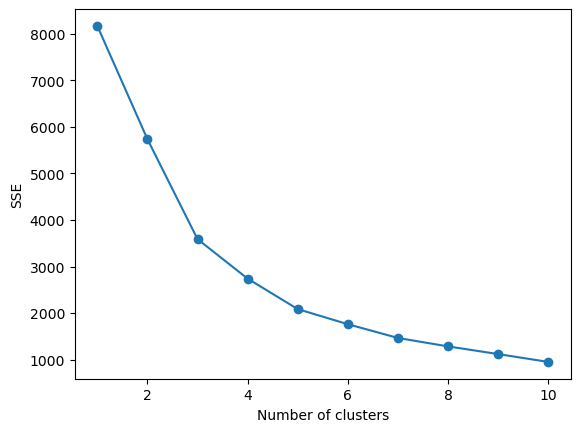

In [49]:
from sklearn.cluster import KMeans
import numpy as np

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


   - **Task 4.3:** Thực hiện K-means clustering.
     - **Gợi ý:** Áp dụng K-means với số cụm tối ưu và gán nhãn cho dữ liệu.
     ```python
     optimal_k = 4  # Giả sử kết quả Elbow Method cho thấy 4 là tối ưu
     kmeans = KMeans(n_clusters=optimal_k, random_state=42)
     rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
     ```


In [50]:
optimal_k = 4  # Giả sử kết quả Elbow Method cho thấy 4 là tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 5. **Phân tích kết quả phân cụm**
   - **Task 5.1:** Gán nhãn phân cụm cho dữ liệu.
     - **Gợi ý:** Dữ liệu đã được gán nhãn trong bước trên.
     ```python
     rfm.head()
     ```


In [51]:
rfm.head()

,Recency,Monetary,Frequency,Cluster
CustomerID,,,,
12346.0,163,77183.60,1,2
12347.0,21,1494.16,71,0
12348.0,86,594.44,11,1
12350.0,148,334.40,17,1
12352.0,100,1561.81,38,1


- **Task 5.2:** Phân tích các đặc điểm của từng cụm.
     - **Gợi ý:** Tính trung bình RFM cho mỗi cụm.
     ```python
     cluster_analysis = rfm.groupby('Cluster').mean()
     cluster_analysis
     ```


In [52]:
cluster_analysis = rfm.groupby('Cluster').mean()
cluster_analysis


,Recency,Monetary,Frequency
Cluster,,,
0,28.067138,1281.882739,62.984688
1,114.009930,449.873654,25.250248
2,31.900000,61941.954000,295.000000
3,1.555556,19112.506667,1239.222222


- **Task 5.3:** Trực quan hóa các cụm khách hàng.
     - **Gợi ý:** Sử dụng biểu đồ scatterplot để trực quan hóa các cụm.
     ```python
     sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
     plt.show()
     ```


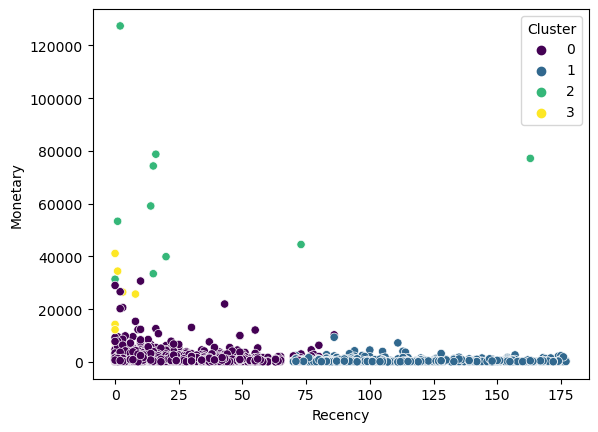

In [53]:
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.show()


### 6. **Đánh giá hiệu quả của mô hình**
   - **Task 6.1:** Tính toán Silhouette Score.
     - **Gợi ý:** Sử dụng `silhouette_score` từ scikit-learn.
     ```python
     from sklearn.metrics import silhouette_score

     silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
     print(f'Silhouette Score: {silhouette_avg}')
     ```


In [54]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.509084895289096


   - **Task 6.2:** Đánh giá sự ổn định của các cụm qua các lần chạy khác nhau.
     - **Gợi ý:** Thực hiện K-means nhiều lần và so sánh kết quả.
     ```python
     for i in range(5):
         kmeans = KMeans(n_clusters=optimal_k, random_state=i)
         clusters = kmeans.fit_predict(rfm_scaled)
         print(f'Run {i+1}: Silhouette Score = {silhouette_score(rfm_scaled, clusters)}')
     ```


In [55]:
for i in range(5):
    kmeans = KMeans(n_clusters=optimal_k, random_state=i)
    clusters = kmeans.fit_predict(rfm_scaled)
    print(f'Run {i+1}: Silhouette Score = {silhouette_score(rfm_scaled, clusters)}')


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 1: Silhouette Score = 0.5082495722373811


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 2: Silhouette Score = 0.509084895289096


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 3: Silhouette Score = 0.509084895289096


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 4: Silhouette Score = 0.5073308172594875


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 5: Silhouette Score = 0.5097877995945538


   - **Task 6.3:** So sánh với các phương pháp phân cụm khác.
     - **Gợi ý:** Thử nghiệm với Agglomerative Clustering và DBSCAN.
     ```python
     from sklearn.cluster import AgglomerativeClustering, DBSCAN

     agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
     rfm['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

     dbscan = DBSCAN(eps=0.5, min_samples=5)
     rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

     silhouette_avg_agg = silhouette_score(rfm_scaled, rfm['Agg_Cluster'])
     silhouette_avg_dbscan = silhouette_score(rfm_scaled, rfm['DBSCAN_Cluster'])

     print(f'Agglomerative Clustering Silhouette Score: {silhouette_avg_agg}')
     print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan}')
     ```



In [56]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
rfm['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

silhouette_avg_agg = silhouette_score(rfm_scaled, rfm['Agg_Cluster'])
silhouette_avg_dbscan = silhouette_score(rfm_scaled, rfm['DBSCAN_Cluster'])

print(f'Agglomerative Clustering Silhouette Score: {silhouette_avg_agg}')
print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan}')

Agglomerative Clustering Silhouette Score: 0.4974465790603128
DBSCAN Silhouette Score: 0.7814651914134483


### 7. **Triển khai và tạo báo cáo**
   - **Task 7.1:** Xuất kết quả phân cụm ra file CSV.
     - **Gợi ý:** Sử dụng `to_csv` để lưu kết quả.
     ```python
     rfm.to_csv('rfm_clusters.csv', index=False)
     ```

   - **Task 7.2:** Tạo báo cáo phân tích kết quả.
     - **Gợi ý:** Sử dụng `matplotlib` để tạo biểu đồ trong báo cáo và viết báo cáo phân tích.
     ```python
     cluster_analysis.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5))
     plt.show()
     ```


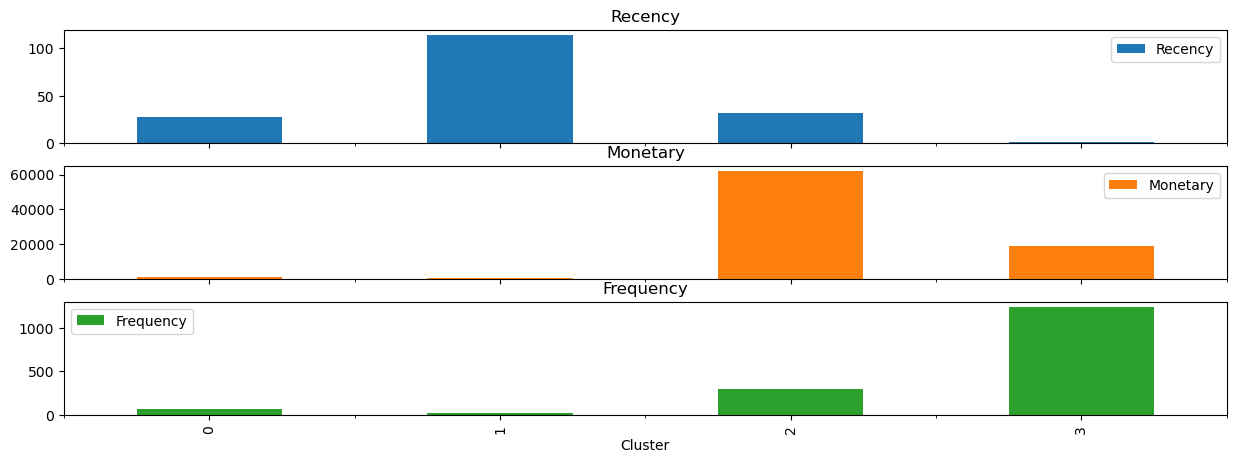

In [57]:
cluster_analysis.plot(kind='bar', subplots=True, figsize=(15, 5))
plt.show()


### 8. **Tối ưu hóa và mở rộng**
   - **Task 8.1:** Tối ưu hóa mô hình.
     - **Gợi ý:** Thử nghiệm với các siêu tham số khác nhau và sử dụng GridSearchCV.
     ```python
     from sklearn.model_selection import GridSearchCV

     param_grid = {'n_clusters': [3, 4, 5, 6], 'init': ['k-means++',

 'random']}
     kmeans = KMeans(random_state=42)
     grid_search = GridSearchCV(kmeans, param_grid, cv=5)
     grid_search.fit(rfm_scaled)

     print(f'Best Params: {grid_search.best_params_}')
     ```

   - **Task 8.2:** Mở rộng mô hình với các đặc trưng khác.
     - **Gợi ý:** Thêm các đặc trưng như dữ liệu nhân khẩu học hoặc hành vi mua hàng.

   - **Task 8.3:** Xây dựng dashboard để giám sát và phân tích các cụm.
